In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
"""
    given a set of points `E` returns the point the most on the left on the x-axis.
"""

def first_point(E):
    xmin, ymin = E[0]
    for (x, y) in E:
        if x <= xmin :
            xmin = x
            ymin = y
    return (xmin, ymin)


The following points are constructed by "turning" around the set $\mathcal{E}$ always in the same direction.
More precisely, if $X$ is a point of the convex envelope and $Y_1,Y_2$ is in $\mathcal{E}$, we say that $Y_1$ is **to the left** of $Y_2$ for the point $X$ if and only if the oriented angle $\widehat{Y_2XY_1}$ is in $[0,\pi]$.

We need to get the point to the left:

For two vectors $u, v \in \mathbb{R}^2$, we have : $\det{(u,v)} = \left\Vert u \right\Vert \times \left\Vert v \right\Vert \times \sin{(u, v)}$

So : $(u, v) = \arcsin{\left(\frac{\det{(u,v)}}{\left\Vert u \right\Vert \times \left\Vert v \right\Vert}\right)}$

In [13]:
def left(X, Y1, Y2):
    if X == Y2:
        return True
    elif X == Y1:
        return False
    
    xx, xy = X
    y1x, y1y = Y1
    y2x, y2y = Y2
    
    lXY2 = np.sqrt((y2x - xx)**2 + (y2y - xy)**2)
    lXY1 = np.sqrt((y1x - xx)**2 + (y1y - xy)**2)
    
    det = (y2x - xx) * (y1y - xy) - (y2y - xy) * (y1x - xx)
    
    angle = np.arcsin(det/(lXY1*lXY2))
    return 0 <= angle <= np.pi

def next_point(E, X):
    most_at_left = first_point(E)
    for Y in E:
        if left(X, Y, most_at_left):
            most_at_left = Y
    return most_at_left


In [16]:
def hull(E):
    fp = first_point(E)
    hul= [fp]
    nextPoint = ()
    currentPoint = fp
    while nextPoint != fp:
        nextPoint = next_point(E, currentPoint)
        hul.append(nextPoint)
        currentPoint = nextPoint
    return hul

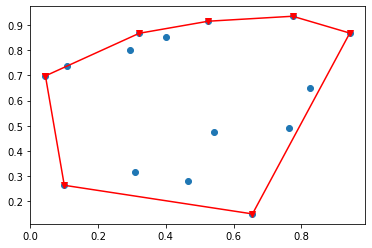

In [20]:
def draw(E):
    x = np.array([k for (k, _) in E])
    y = np.array([k for (_, k) in E])
    plt.scatter(x, y)
    
    hul = hull(E)
    hulx = np.array([k for (k, _) in hul]);
    huly = np.array([k for (_, k) in hul]);
    plt.plot(hulx, huly, "vr-")

E = []
for _ in range(0, 15):
    E.append((np.random.random_sample(), np.random.random_sample()))
draw(E)